In [1]:
%pylab inline
import geomalgo as ga

Populating the interactive namespace from numpy and matplotlib


In [2]:
A = ga.Point3D(0, 0, 0)
B = ga.Point3D(1, 1, 0)
C = ga.Point3D(0, 0, 1)
ABC = ga.Triangle3D(A, B, C)

P = ga.Point3D(0.2, 0., 0.4)
Q = ga.Point3D(0.2, 1., 0.4)
PQ = ga.Segment3D(P, Q)

I = ga.intersec3d_triangle_segment(ABC, PQ)

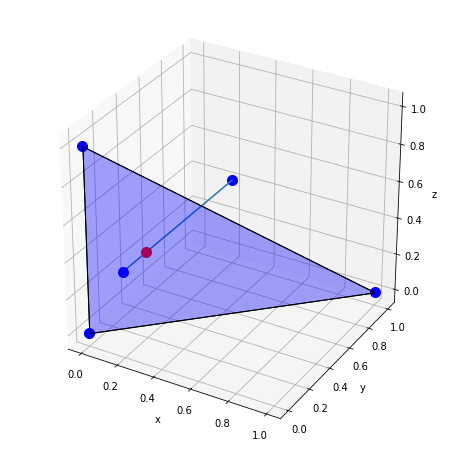

In [3]:
fig = plt.figure(figsize=(8,8))

for obj in [ABC, A, B, C, PQ, P, Q]:
    obj.plot()
    
I.plot(color='r')

ABC.plot()

ax = gca(projection='3d')
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')